# **Hypothesis Testing**

**Objective:** Find out which variables of the TikTok reports dataset have statistically significant difference between the reports with claims and the reports with opinion. The reason for this is to determine the features that will have an statistically significant impact on prediction of the claim status by the machine learning model.

**Action:** 

In [1]:
import numpy as  np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp

In [2]:
data = pd.read_csv("../datasets/tiktok_dataset_cleaned.csv")
raw_data = pd.read_csv("../datasets/tiktok_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19064 entries, 0 to 19063
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19064 non-null  object 
 1   video_duration_sec        19064 non-null  int64  
 2   video_transcription_text  19064 non-null  object 
 3   verified_status           19064 non-null  object 
 4   author_ban_status         19064 non-null  object 
 5   video_view_count          19064 non-null  float64
 6   video_like_count          19064 non-null  float64
 7   video_share_count         19064 non-null  float64
 8   video_download_count      19064 non-null  float64
 9   video_comment_count       19064 non-null  float64
 10  video_view_count_log      19064 non-null  float64
 11  video_like_count_log      19064 non-null  float64
 12  video_share_count_log     19064 non-null  float64
 13  video_download_count_log  19064 non-null  float64
 14  video_

# Hypothesis Testing
Following hypothesis testing will be two-sample t-test to determine whether there is a statistically significant difference between the rates of claims and opinions. Here the log-transformed version of view, like, share, download and comment is used because it is more normal distributed than the originial right skewed distribution.<br> 
Null Hypothesis: There is no difference between the rates of claims and the rates of opinions. <br>
Alternative Hypothesis: There is a statistically significant difference between the rates of claims and the rates of opinions.
Significance level: 1%



In [4]:
claim_data = data[data["claim_status"] == "claim"]
opinion_data = data[data["claim_status"] == "opinion"]
rates_list = ['video_duration_sec','video_view_count_log', 'video_like_count_log', 'video_share_count_log',
       'video_download_count_log', 'video_comment_count_log']
significance_level = 0.01

In [5]:
rate = rates_list[0]
stats.ttest_ind(a=claim_data[rate], b=opinion_data[rate], equal_var=False).pvalue 

0.6157541234477404

In [6]:
for rate in rates_list:
  p_value = stats.ttest_ind(a=claim_data[rate], b=opinion_data[rate], equal_var=False).pvalue
  decision = "definitely statistically significant" if p_value * 1000 < significance_level else "statistically significant" if p_value < significance_level else "by chance"
  print(f"The difference in {rate} between claims and opinions is {decision} with a p-value of {p_value}.")

The difference in video_duration_sec between claims and opinions is by chance with a p-value of 0.6157541234477404.
The difference in video_view_count_log between claims and opinions is definitely statistically significant with a p-value of 0.0.
The difference in video_like_count_log between claims and opinions is definitely statistically significant with a p-value of 0.0.
The difference in video_share_count_log between claims and opinions is definitely statistically significant with a p-value of 0.0.
The difference in video_download_count_log between claims and opinions is definitely statistically significant with a p-value of 0.0.
The difference in video_comment_count_log between claims and opinions is definitely statistically significant with a p-value of 0.0.


**The sample size of 9000 leads to p-value close to 0. Therefore use sample size of 30, iterate it and take the mean p-value.** 

In [7]:
for rate in rates_list:
  p_list = []
  for i in range(1000):
    p_value = stats.ttest_ind(a=claim_data[rate].sample(30), b=opinion_data[rate].sample(30), equal_var=False).pvalue
    p_list.append(p_value)
  
  p_value = np.array(p_list).mean()
  decision = ("definitely statistically significant" if p_value * 1000 < significance_level 
                                                    else "statistically significant" if p_value < significance_level else "by chance")
  print(f"The difference in {rate} between claims and opinions is {decision} with a p-value of {p_value}.")

The difference in video_duration_sec between claims and opinions is by chance with a p-value of 0.5147650816599904.
The difference in video_view_count_log between claims and opinions is definitely statistically significant with a p-value of 6.4264515880335315e-18.
The difference in video_like_count_log between claims and opinions is definitely statistically significant with a p-value of 1.2622720170340637e-14.
The difference in video_share_count_log between claims and opinions is definitely statistically significant with a p-value of 8.803804790889653e-12.
The difference in video_download_count_log between claims and opinions is definitely statistically significant with a p-value of 1.2519545160938953e-11.
The difference in video_comment_count_log between claims and opinions is definitely statistically significant with a p-value of 2.5881746120101935e-11.


**Reject** null hyptohesis of *view, like, share, download, comment*. <br>
**Fail to Reject** null hypothesis of *duration* (p-value 0.5 > 0.01)

Now test the author ban status and author verified status for claims and opinions. Proportion z-tests are hypothesis tests that observes the p-value between categorical samples. <br>
**Null Hypothesis:** There is no difference between the status proportion of claims and the status proportion of opinions. <br>
**Alternative Hypothesis:** There is a statistically significant difference between the status proportion of claims and the status proportion of opinions.
**Significance level:** 1%

In [8]:
data.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count', 'video_view_count_log', 'video_like_count_log',
       'video_share_count_log', 'video_download_count_log',
       'video_comment_count_log'],
      dtype='object')

In [9]:
a = [0,0]
a[0] =1
print(a)

[1, 0]


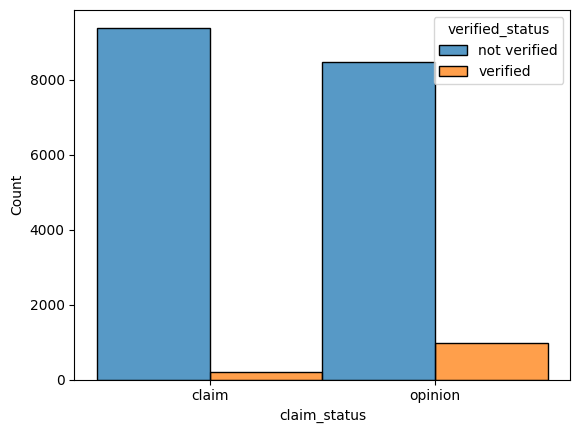

The difference in author verified status between claims and opinions is definitely statistically significant with a p-value of 1.0636774322810105e-122.


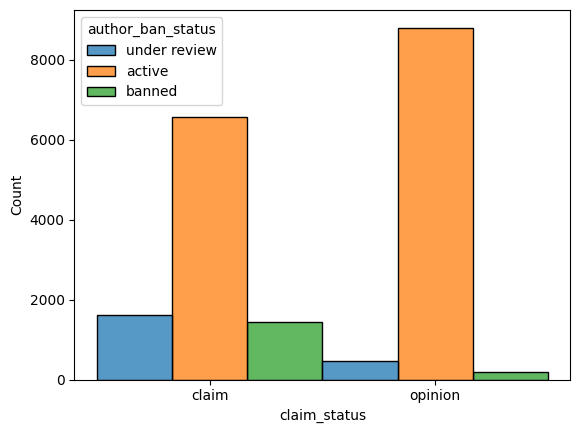

The difference in author verified status between claims and opinions is definitely statistically significant with a p-value of 0.0.


In [10]:
# calculate ztests of proportion automatically, based on index of the GroupBy Dataframe

for status in ['verified_status', 'author_ban_status']:
  proportion = data.groupby(["claim_status", status])[status].count()
  sns.histplot(x=data["claim_status"] , hue=data[status], multiple="dodge")
  plt.show()
  total = [0,0]
  for i in range(2):
    l = len(proportion.index)
    sample1 = proportion.iloc[0]
    sample2 = proportion.iloc[l//2]

    for j in range(l//2):
      total[i] += proportion.iloc[j + (l//2 * i)]

  success = np.array([sample1,sample2])
  total = np.array(total)

  p_value = sp.proportions_ztest(count=success, nobs=total, alternative="two-sided")[1]
  decision = "definitely statistically significant" if p_value * 1000 < significance_level else "statistically significant" if p_value < significance_level else "by chance"

  print(f"The difference in author verified status between claims and opinions is {decision} with a p-value of {p_value}.")


**The differences in author verified status and author ban status between claims and opinions are both statistically significant <br>
because their p-values are close to 0 and not even close to the significacne level of 0.01.**

In [11]:
data

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_view_count_log,video_like_count_log,video_share_count_log,video_download_count_log,video_comment_count_log
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,12.746348,9.874316,5.484797,0.000000,0.000000
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,11.855642,11.256160,9.853982,7.057037,6.527958
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,13.712575,11.489554,7.957877,6.725034,5.796058
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,12.988846,12.388203,10.457717,7.118016,6.369901
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,10.936085,10.462732,8.321178,6.304449,5.023881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19059,opinion,49,in our opinion the earth holds about 11 quinti...,not verified,active,6067.0,423.0,81.0,8.0,2.0,8.710620,6.047372,4.394449,2.079442,0.693147
19060,opinion,23,in our opinion the queens in ant colonies live...,not verified,active,2973.0,820.0,70.0,3.0,0.0,7.997327,6.709304,4.248495,1.098612,0.000000
19061,opinion,50,in our opinion the moon is moving away from th...,not verified,active,734.0,102.0,7.0,2.0,1.0,6.598509,4.624973,1.945910,0.693147,0.000000
19062,opinion,8,in our opinion lightning strikes somewhere on ...,not verified,active,3394.0,655.0,123.0,11.0,4.0,8.129764,6.484635,4.812184,2.397895,1.386294


**All variables were analyzed expect video_transcription_text. Lets do that.**

In [12]:
data["video_transcription_text"].describe()

count                                                 19064
unique                                                18992
top       a friend read  in the media a claim that floss...
freq                                                      2
Name: video_transcription_text, dtype: object

In [13]:
data["text_length"] = data["video_transcription_text"].apply(lambda x: len(x))

In [14]:
claim_data = data[data["claim_status"] == "claim"]
opinion_data = data[data["claim_status"] == "opinion"]

<Axes: xlabel='text_length', ylabel='Count'>

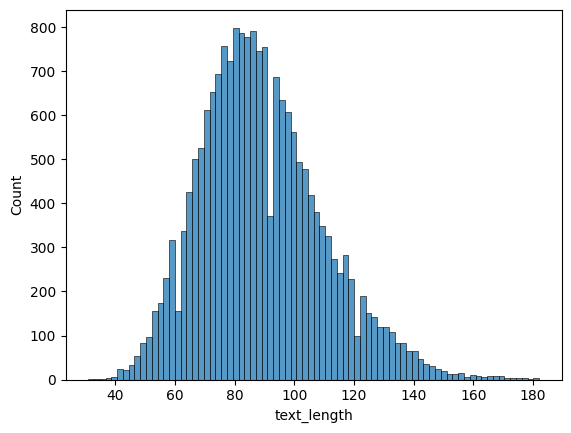

In [15]:
sns.histplot(data["text_length"])

In [16]:
rate = "text_length"
p_list = []
for i in range(1000):
  p_value = stats.ttest_ind(a=claim_data[rate].sample(30), b=opinion_data[rate].sample(30), equal_var=False).pvalue
  p_list.append(p_value)

p_value = np.array(p_list).mean()
decision = "definitely statistically significant" if p_value * 1000 < significance_level else "statistically significant" if p_value < significance_level else "by chance"
print(f"The difference in {rate} between claims and opinions is {decision} with a p-value of {p_value}.")

The difference in text_length between claims and opinions is by chance with a p-value of 0.07869274953748041.


**The transcription text length is not statistically significant, therefore we dont need it for further steps. We dont the duration variable as well.**

In [17]:
final_data = data.drop(columns=["video_transcription_text", "text_length", "video_duration_sec"])

**For following XGBoost and Random Forest, we can use the normal dataset instead of log-transformed <br> 
because XGBoost and Random Forest are tree-based algorithms which are generally not sensitive to the scale of features.**

In [19]:
final_data = final_data.drop(columns=['video_view_count_log', 'video_like_count_log', 'video_share_count_log', 'video_download_count_log', 'video_comment_count_log'])

In [20]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19064 entries, 0 to 19063
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_status          19064 non-null  object 
 1   verified_status       19064 non-null  object 
 2   author_ban_status     19064 non-null  object 
 3   video_view_count      19064 non-null  float64
 4   video_like_count      19064 non-null  float64
 5   video_share_count     19064 non-null  float64
 6   video_download_count  19064 non-null  float64
 7   video_comment_count   19064 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


In [21]:
try:
  with open("../datasets/tiktok_final_dataset.csv", "r"):
    print("File already exists")
except FileNotFoundError:
  final_data.to_csv("../datasets/tiktok_final_dataset.csv", index=False)

File already exists
